# К-средина

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/Petlja/specit4_ai_radni/blob/main/к-средина.ipynb)

Ова свеска прати садржај лекције о кластеровању у којој се приказује алгоритам к-средина.

Изврши следећу ћелију са кодом како би учитао библиотеке које су неопходне за рад.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

In [ ]:
np.random.seed(7)

Следећа ћелија садржи код којим се креира скуп података. Он се састоји од 100 инстанци са по два нумеричка атрибута. Изврши је и креирај скуп података.

In [ ]:
def kreiraj_podatke():
  X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.5, random_state=6)
  return X

X = kreiraj_podatke()

Овако креирани скуп можеш графички да прикажеш ако извршиш наредну ћелију. Дуж x-осе је приказан први атрибут, а дуж y-осе други атрибут.

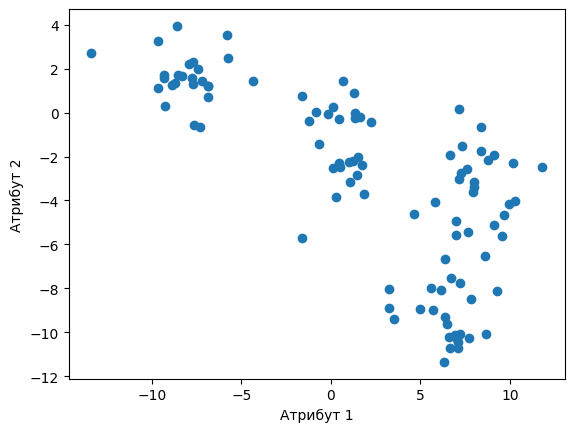

In [ ]:
plt.xlabel('Атрибут 1')
plt.ylabel('Атрибут 2')

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Следећа ћелија садржи подешавања која ће се надаље користити: број кластера к и њихове боје.

In [ ]:
k = 4
boje_klastera = ['orange', 'yellow', 'purple', 'green']

Функција `izracunaj_rastojanje` рачуна еуклидско растојање између две тачке у равни. У даљем коду ће се користити код рачунања растојања између центроида и инстанци.

In [ ]:
def izracunaj_rastojanje(x1, x2):
  return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

Функција `generisi_centroide` генерише `k` насумичних инстанци које су неопходне за иницијализацију алгоритма к-средина.

In [ ]:
def generisi_centroide(X, k):
  N = X.shape[0]
  indeksi = np.random.randint(low=0, high=N, size=k)
  return X[indeksi]

In [ ]:
centroide = generisi_centroide(X, 4)

Функција `prikazi_centroide` нам омогућава да видимо где се у односу на кластере налазе центроиде.

In [ ]:
def prikazi_centroide(X, centroide, boje_klastera=boje_klastera):
  plt.xlabel('Атрибут 1')
  plt.ylabel('Атрибут 2')

  plt.scatter(X[:, 0], X[:, 1])

  for i, centroida in enumerate(centroide):
    plt.scatter(centroida[0], centroida[1], color=boje_klastera[i], marker='*')

  plt.show()

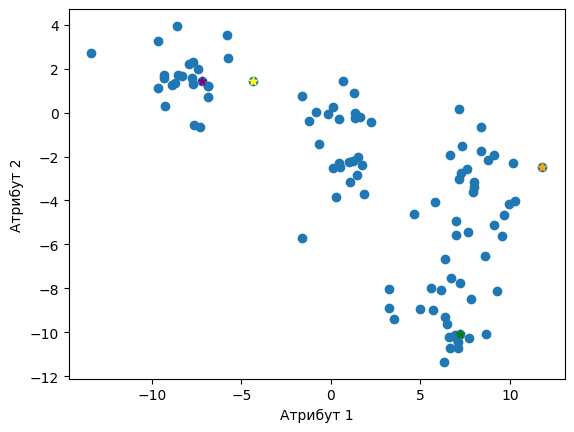

In [ ]:
prikazi_centroide(X, centroide)

Функција `podeli_podatke` врши поделу инстанци по кластерима. Она за сваку инстанцу прво израчуна растојања до центроида. Затим, издвоји центроид којем је инстанца најближа (растојање до те центроиде је најмање) а потом и придружи инстанцу кластеру који он одређује. За разликовање кластера користићемо бројеве 0, 1, 2,..., k-1.

In [ ]:
def podeli_podatke(X, centroide, k):

  # inicijalizujemo listu obelezja klastera
  labele_klastera = []

  # prolazimo kroz skup instanci instancu po instancu
  for x in X:

    # inicijalizujemo listu rastojanja do centroida
    rastojanja_do_centroida = []

    # zatim za svaki centroid ...
    for centroid in centroide:
      # ... izracunavamo rastojanje izmedju instance i centroida
      r = izracunaj_rastojanje(x, centroid)

      # ... i dodajemo ga u niz sa rastojanjima
      rastojanja_do_centroida.append(r)

    # kada obidjemo sve centroide,
    # biramo centroid koji je najblizi instanci x
    labela  = np.argmin(rastojanja_do_centroida)

    # zakljucujemo da instanca pripada klasteru koji
    # odredjuje ta centroida
    labele_klastera.append(labela)

  # rezultat funkcije je niz sa obelezjima klastera
  return np.array(labele_klastera)

In [ ]:
labele_klastera = podeli_podatke(X, centroide, k)

Следећа ћелија садржи функцију која израчунава број инстанци по кластерима. Можеш да је извршиш и видиш какав је бројни однос кластера.

In [ ]:
def prikazi_broj_instanci_po_klasterima(k, labele_klastera, boje_klastera=boje_klastera):
  plt.bar(np.arange(0, k), np.bincount(labele_klastera), color=boje_klastera)
  plt.xticks(np.arange(0, k),np.arange(0, k))
  plt.show()

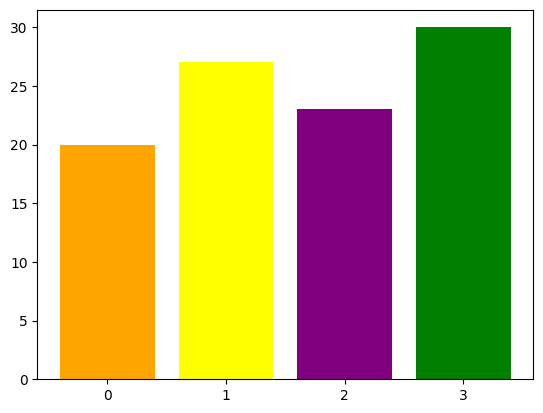

In [ ]:
prikazi_broj_instanci_po_klasterima(k, labele_klastera)

Функција `prikazi_klastere` приказује поделу података по кластерима. Центроиде кластера су због видљивости приказане као црне звездице.

In [ ]:
def prikazi_klastere(X, centroide, labele_klastera, boje_klastera=boje_klastera):
  plt.xlabel('Атрибут 1')
  plt.ylabel('Атрибут 2')

  for i, x in enumerate(X):
    boja_instance = boje_klastera[labele_klastera[i]]
    plt.scatter(x[0], x[1], color=boja_instance)

  for centroida in centroide:
    plt.scatter(centroida[0], centroida[1], color= 'black', marker='*')

  plt.show()

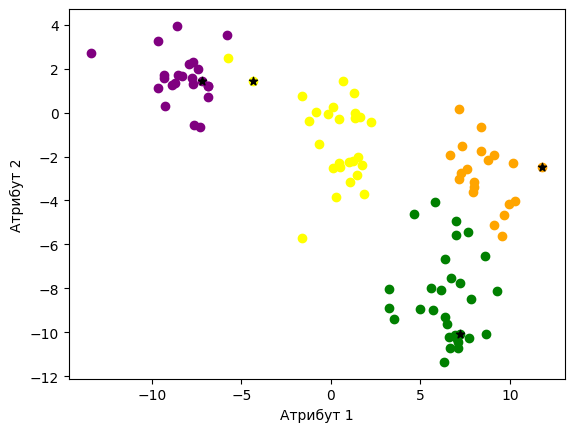

In [ ]:
prikazi_klastere(X, centroide, labele_klastera)

Функција `izracunaj_nove_centroide` врши ажурирање центроида кластера. То ради тако што упросечи вредност свих инстанци које припадају једном кластеру и тако добијену вредност прогласи новом центроидом.

In [ ]:
def izracunaj_nove_centroide(X, labele_klastera, k):

  # inicijalizujemo listu novih centroida
  nove_centroide = []

  # za svaki klaster
  for i in range(0, k):

    # ... izdvajamo instance koje mu pripadaju
    indeksi_instanci = labele_klastera == i
    instance_u_klasteru = X[indeksi_instanci]

    # zatim izracunavamo novu vrednost centroide
    # tako sto izracunamo prosek svih instanci u klasteru
    nova_centroida = np.average(instance_u_klasteru, axis=0)

    # izracunatu novu centroidu dodajemo u listu svih centroida
    nove_centroide.append(nova_centroida)

  # rezultat funkcije je niz novih centroida
  return np.array(nove_centroide)

In [ ]:
nove_centroide = izracunaj_nove_centroide(X, np.array(labele_klastera), k)

Да би се уверили где се налазе нове центроиде, позваћемо функцију `prikazi_centroide`.

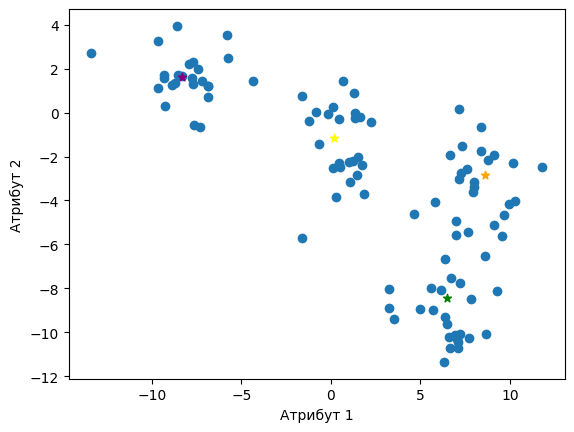

In [ ]:
prikazi_centroide(X, nove_centroide)

Функција `ivrsi_klasterovanje` спаја све кораке које смо прошли појединачно:
* генерише почетне центроиде
* у итерацијама врши поделе инстанци по кластерима, а затим и израчунава нове центроиде.

In [ ]:
def izvrsi_klasterovanje(X, k, epsilon=1e-4, max_broj_iteracija=300):

  # korak inicijalizacije centroida
  centroide = generisi_centroide(X, k)

  # u svakoj iteraciji petlje
  for i in range(0, max_broj_iteracija):

    # korak 1: podela instanci u klastera
    labele_klastera = podeli_podatke(X, centroide, k)

    # korak 2: izracunavanje novih centroida
    nove_centroide = izracunaj_nove_centroide(X, labele_klastera, k)

    # provera zaustavnih kriterijuma
    # ukoliko su oni ispunjeni prekidamo algoritam
    if np.linalg.norm (nove_centroide - centroide) < epsilon:
      break
    # dok u suprotnom prelazimo na novu iteraciju
    centroide = nove_centroide.copy()

  # rezultat funkcije su finalne labele klastera i vrednosti centroida
  return labele_klastera, nove_centroide

In [ ]:
finalne_labele_klastera, finalne_centroide = izvrsi_klasterovanje(X, k)

Можемо прво да проверимо бројчани однос инстанци у финалним кластерима.

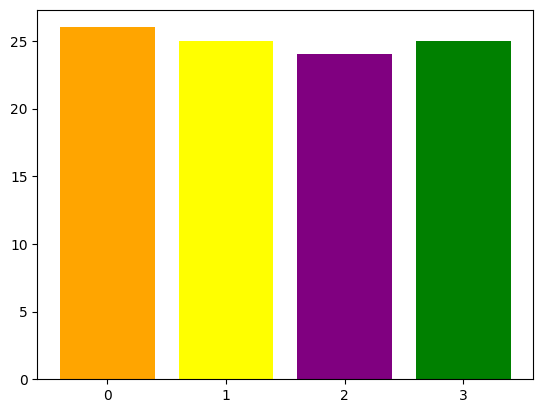

In [ ]:
prikazi_broj_instanci_po_klasterima(k, finalne_labele_klastera)

Сада прикажимо и финалне кластере.

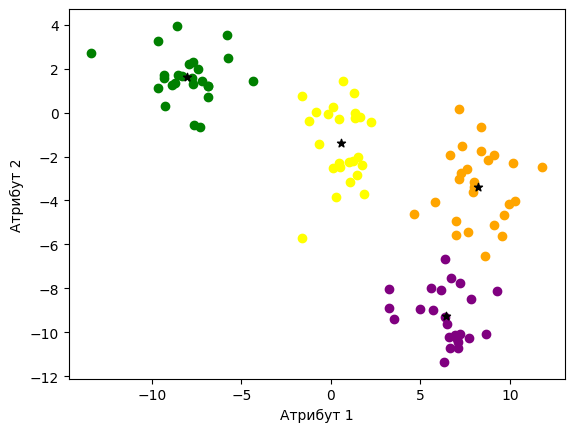

In [ ]:
prikazi_klastere(X, finalne_centroide, finalne_labele_klastera)

Следећи блок кода служи за приказ анимације свих корака поделе скупа података на кластере.

In [ ]:
from IPython.display import display, clear_output

In [ ]:
def prikazi_animaciju(X, k):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  # inicijalizacija
  broj_iteracija = 300
  epsilon = 1e-4

  # pocetne vrednosti centroida
  centroide = generisi_centroide(X, k)

  # pojedinacne iteracije
  for iteracija in range(0, broj_iteracija):
    labele_klastera = podeli_podatke(X, centroide, k)

    # prikaz klastera
    ax.cla()
    ax.set_title('Iteracija broj: ' + str(iteracija))

    for i, x in enumerate(X):
      boja_instance = boje_klastera[labele_klastera[i]]
      ax.scatter(x[0], x[1], color=boja_instance)

    for centroida in centroide:
      ax.scatter(centroida[0], centroida[1], color= 'black', marker='*')

    display(fig)
    clear_output(wait=True)
    # plt.pause(0.5)

    # izracunavanja centroida sledece iteracije
    nove_centroide = izracunaj_nove_centroide(X, labele_klastera, k)
    if np.linalg.norm (nove_centroide - centroide) < epsilon:
      break

    centroide = nove_centroide.copy()

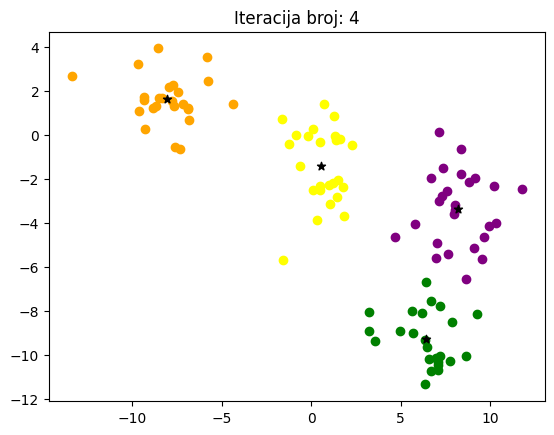

In [ ]:
prikazi_animaciju(X, k)